First, we need to import libraries. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [3]:
chicago_2019_data = pd.read_csv('chicago_2019.csv')
chicago_2019_wheater = pd.read_csv('weather_hourly_chicago.csv')

# 1.1 Cleaning Main Chicago Bike data

In [4]:
chicago_2019_data.head(8)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber
5,2019-01-01 00:15:33,2019-01-01 00:19:09,98,49,LaSalle St & Washington St,Dearborn St & Monroe St,2437,Subscriber
6,2019-01-01 00:16:06,2019-01-01 00:19:03,98,49,LaSalle St & Washington St,Dearborn St & Monroe St,2708,Subscriber
7,2019-01-01 00:18:41,2019-01-01 00:20:21,211,142,St. Clair St & Erie St,McClurg Ct & Erie St,2796,Subscriber


Checking for missing data 

In [5]:
len(chicago_2019_data)-len(chicago_2019_data.dropna())

0

Drop any missing Data

Defining new clean dataset

In [6]:
chicago_2019_data_clean = chicago_2019_data.dropna(axis=0)

In [7]:
chicago_2019_data_clean.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber


To have a comparable and uniform dataset, we remove the milliseconds from all start and end times.

In [8]:
def clean_date(x): return x.split('.')[0]

chicago_2019_data_clean['start_time'] = chicago_2019_data_clean['start_time'].apply(lambda x: clean_date(x))
chicago_2019_data_clean['end_time'] = chicago_2019_data_clean['end_time'].apply(lambda x: clean_date(x))
chicago_2019_data_clean.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber


# 1.2 Preparing Divvybikes Data

To extract information, the Data is grouped by data, weekday, hour and month. 

In [9]:
def get_date(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()

def get_weekday(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday()

def get_hour(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour

def get_month(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month

In [10]:
chicago_2019_data_clean.reset_index(drop=True)
chicago_2019_data_clean['date'] = chicago_2019_data_clean['start_time'].apply(lambda x: get_date(x))

In [11]:
chicago_2019_data_clean['weekday'] = chicago_2019_data_clean['start_time'].apply(lambda x: get_weekday(x))

In [12]:
chicago_2019_data_clean['hour'] = chicago_2019_data_clean['start_time'].apply(lambda x: get_hour(x))


In [13]:
chicago_2019_data_clean['month'] = chicago_2019_data_clean['start_time'].apply(lambda x: get_month(x))

In [14]:
chicago_2019_data_clean.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,0,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,2019-01-01,1,0,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,2019-01-01,1,0,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,0,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,0,1


# 1.3 Divvy Bikes stations dataset

In [15]:
bike_stations = pd.read_csv('bike_stations_2019.csv')
bike_stations.head(1000)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3D669F62A2D8DB93,docked_bike,2020-01-16 17:47:09,2020-01-16 17:52:38,Damen Ave & Pierce Ave,69,Marshfield Ave & Cortland St,58.0,41.9094,-87.6777,41.9160,-87.6689,member
996,975CC5A08E0B1435,docked_bike,2020-01-16 07:24:41,2020-01-16 07:27:44,Damen Ave & Cortland St,219,Damen Ave & Pierce Ave,69.0,41.9160,-87.6773,41.9094,-87.6777,member
997,AA7FC7C88B554E38,docked_bike,2020-01-03 09:04:52,2020-01-03 09:10:37,Noble St & Milwaukee Ave,29,Ogden Ave & Race Ave,186.0,41.9007,-87.6626,41.8918,-87.6588,member
998,2F62F3CF785E5A87,docked_bike,2020-01-03 15:32:50,2020-01-03 15:44:13,Ogden Ave & Race Ave,186,Sheffield Ave & Kingsbury St,20.0,41.8918,-87.6588,41.9105,-87.6531,member


In [16]:
chicago_2019_data_clean.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,0,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,2019-01-01,1,0,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,2019-01-01,1,0,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,0,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,0,1


In [17]:
len(bike_stations) - len(bike_stations.dropna())

1

In [18]:
bike_stations = bike_stations.dropna(axis=0)

In [19]:
bike_stations_geo=pd.merge(chicago_2019_data_clean, bike_stations, on=['start_station_name','end_station_name'])

In [20]:
print(bike_stations_geo.columns)

Index(['start_time', 'end_time', 'start_station_id_x', 'end_station_id_x',
       'start_station_name', 'end_station_name', 'bike_id', 'user_type',
       'date', 'weekday', 'hour', 'month', 'ride_id', 'rideable_type',
       'started_at', 'ended_at', 'start_station_id_y', 'end_station_id_y',
       'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual'],
      dtype='object')


In [21]:
print(type(bike_stations_geo))

<class 'pandas.core.frame.DataFrame'>


In [22]:
bike_stations_geo = bike_stations_geo.drop_duplicates(subset=['start_station_id_x', 'end_station_id_x'])

In [23]:
bike_stations_geo = bike_stations_geo.rename(columns={'start_station_id_x': 'start_station_id', 'end_station_id_x': 'end_station_id'})

In [24]:
bike_stations_geo.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,...,rideable_type,started_at,ended_at,start_station_id_y,end_station_id_y,start_lat,start_lng,end_lat,end_lng,member_casual
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,docked_bike,2020-01-09 20:53:13,2020-01-09 21:00:24,199,84.0,41.8915,-87.6268,41.8916,-87.6484,member
6384,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,docked_bike,2020-02-08 20:23:05,2020-02-08 20:44:16,123,176.0,41.9227,-87.6972,41.9030,-87.6313,member
6393,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,...,docked_bike,2020-01-02 13:59:18,2020-01-02 14:12:29,173,35.0,41.8969,-87.6217,41.8923,-87.6120,casual
38307,2019-01-01 00:15:33,2019-01-01 00:19:09,98,49,LaSalle St & Washington St,Dearborn St & Monroe St,2437,Subscriber,2019-01-01,1,...,docked_bike,2020-01-02 18:16:13,2020-01-02 18:21:51,98,49.0,41.8827,-87.6325,41.8813,-87.6295,member
38573,2019-01-01 00:18:41,2019-01-01 00:20:21,211,142,St. Clair St & Erie St,McClurg Ct & Erie St,2796,Subscriber,2019-01-01,1,...,docked_bike,2020-01-03 14:32:47,2020-01-03 14:34:48,211,142.0,41.8944,-87.6227,41.8945,-87.6179,member


In [25]:
bike_stations_geo = bike_stations_geo.drop(columns=['start_station_id_y', 'end_station_id_y'], axis=1)

In [26]:
bike_stations_geo.head(10000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,...,month,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,1,D6AFA51AF43BE75A,docked_bike,2020-01-09 20:53:13,2020-01-09 21:00:24,41.8915,-87.6268,41.8916,-87.6484,member
6384,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,1,4AB813DD47E10D6D,docked_bike,2020-02-08 20:23:05,2020-02-08 20:44:16,41.9227,-87.6972,41.9030,-87.6313,member
6393,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,...,1,B49D5256F7F1FE1F,docked_bike,2020-01-02 13:59:18,2020-01-02 14:12:29,41.8969,-87.6217,41.8923,-87.6120,casual
38307,2019-01-01 00:15:33,2019-01-01 00:19:09,98,49,LaSalle St & Washington St,Dearborn St & Monroe St,2437,Subscriber,2019-01-01,1,...,1,C077A38F03B557B9,docked_bike,2020-01-02 18:16:13,2020-01-02 18:21:51,41.8827,-87.6325,41.8813,-87.6295,member
38573,2019-01-01 00:18:41,2019-01-01 00:20:21,211,142,St. Clair St & Erie St,McClurg Ct & Erie St,2796,Subscriber,2019-01-01,1,...,1,166B22E6DB394DCD,docked_bike,2020-01-03 14:32:47,2020-01-03 14:34:48,41.8944,-87.6227,41.8945,-87.6179,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117169162,2019-01-06 13:47:39,2019-01-06 13:51:48,288,93,Larrabee St & Armitage Ave,Sheffield Ave & Willow St,4928,Subscriber,2019-01-06,6,...,1,D8BC522783636761,docked_bike,2020-01-05 14:37:05,2020-01-05 14:42:49,41.9181,-87.6437,41.9137,-87.6529,member
117170072,2019-01-06 13:48:38,2019-01-06 13:57:10,202,273,Halsted St & 18th St,Michigan Ave & 18th St,6122,Subscriber,2019-01-06,6,...,1,59E1D8BFFB4EB2E9,docked_bike,2020-01-03 13:39:08,2020-01-03 13:48:23,41.8575,-87.6463,41.8578,-87.6246,member
117170886,2019-01-06 13:49:41,2019-01-06 13:53:00,637,637,Wood St & Chicago Ave (*),Wood St & Chicago Ave (*),3310,Customer,2019-01-06,6,...,1,C7E12697C2B415AE,docked_bike,2020-01-10 08:27:55,2020-01-10 08:28:44,41.8956,-87.6721,41.8956,-87.6721,member
117173883,2019-01-06 13:50:08,2019-01-06 13:55:28,623,168,Michigan Ave & 8th St,Michigan Ave & 14th St,2202,Subscriber,2019-01-06,6,...,1,3EF9281FD871BD22,docked_bike,2020-01-08 14:40:12,2020-01-08 14:45:53,41.8728,-87.6240,41.8641,-87.6237,member


In [27]:
#adding coordinates to the main dataset 
bike_stations_geo['start_coordinates'] = list(zip(bike_stations_geo["start_lat"],bike_stations_geo["start_lng"]))

In [28]:
bike_stations_geo['end_coordinates'] = list(zip(bike_stations_geo["end_lat"],bike_stations_geo["end_lng"]))

In [29]:
bike_stations_geo.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,...,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,start_coordinates,end_coordinates
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,docked_bike,2020-01-09 20:53:13,2020-01-09 21:00:24,41.8915,-87.6268,41.8916,-87.6484,member,"(41.8915, -87.6268)","(41.8916, -87.6484)"
6384,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,docked_bike,2020-02-08 20:23:05,2020-02-08 20:44:16,41.9227,-87.6972,41.9030,-87.6313,member,"(41.9227, -87.6972)","(41.903, -87.6313)"
6393,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,...,docked_bike,2020-01-02 13:59:18,2020-01-02 14:12:29,41.8969,-87.6217,41.8923,-87.6120,casual,"(41.8969, -87.6217)","(41.8923, -87.612)"
38307,2019-01-01 00:15:33,2019-01-01 00:19:09,98,49,LaSalle St & Washington St,Dearborn St & Monroe St,2437,Subscriber,2019-01-01,1,...,docked_bike,2020-01-02 18:16:13,2020-01-02 18:21:51,41.8827,-87.6325,41.8813,-87.6295,member,"(41.8827, -87.6325)","(41.8813, -87.6295)"
38573,2019-01-01 00:18:41,2019-01-01 00:20:21,211,142,St. Clair St & Erie St,McClurg Ct & Erie St,2796,Subscriber,2019-01-01,1,...,docked_bike,2020-01-03 14:32:47,2020-01-03 14:34:48,41.8944,-87.6227,41.8945,-87.6179,member,"(41.8944, -87.6227)","(41.8945, -87.6179)"


In [30]:
len(bike_stations_geo)-len(bike_stations_geo.dropna())

0

# 1.4 Cleaning Chicago wheater dataset

In [31]:
chicago_weather = pd.read_csv('weather_hourly_chicago.csv')
chicago_weather.head(5)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.7,-1.7,0.0
1,2015-01-02 02:00:00,-2.2,-2.2,0.0
2,2015-01-02 03:00:00,-2.8,-2.8,0.0
3,2015-01-02 04:00:00,-3.3,-3.3,0.0
4,2015-01-02 05:00:00,-4.4,-4.4,0.0


Drop missing values/data

In [32]:
chicago_weather_clean = chicago_weather.dropna()
len(chicago_weather) - len(chicago_weather.dropna())

60

Merge main dataset with weather dataset

In [33]:
chicago_weather_clean.reset_index(drop=True)
pd.options.mode.chained_assignment = None
chicago_weather_clean['date'] = chicago_weather_clean['date_time'].apply(lambda x:get_date(x))
chicago_weather_clean['hour'] = chicago_weather_clean['date_time'].apply(lambda x:get_hour(x))
chicago_weather_clean.head(10)

,date_time,max_temp,min_temp,precip,date,hour
0,2015-01-02 01:00:00,-1.7,-1.7,0.0,2015-01-02,1
1,2015-01-02 02:00:00,-2.2,-2.2,0.0,2015-01-02,2
2,2015-01-02 03:00:00,-2.8,-2.8,0.0,2015-01-02,3
3,2015-01-02 04:00:00,-3.3,-3.3,0.0,2015-01-02,4
4,2015-01-02 05:00:00,-4.4,-4.4,0.0,2015-01-02,5
5,2015-01-02 06:00:00,-5.0,-5.0,0.0,2015-01-02,6
6,2015-01-01 07:00:00,-8.3,-8.3,0.0,2015-01-01,7
7,2015-01-01 08:00:00,-8.9,-8.9,0.0,2015-01-01,8
8,2015-01-01 09:00:00,-8.9,-8.9,0.0,2015-01-01,9
9,2015-01-01 10:00:00,-9.4,-9.4,0.0,2015-01-01,10


In [34]:
chicago_2019_geodata_with_temp = pd.merge(bike_stations_geo, 
                                            chicago_weather_clean[['max_temp','min_temp', 'precip', 'date', 'hour']],
                                            on=['date', 'hour'], how="left")
chicago_2019_geodata_with_temp.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,...,start_lat,start_lng,end_lat,end_lng,member_casual,start_coordinates,end_coordinates,max_temp,min_temp,precip
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,41.8915,-87.6268,41.8916,-87.6484,member,"(41.8915, -87.6268)","(41.8916, -87.6484)",2.8,2.2,1.0
1,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,41.8915,-87.6268,41.8916,-87.6484,member,"(41.8915, -87.6268)","(41.8916, -87.6484)",2.8,2.8,1.0
2,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,41.9227,-87.6972,41.9030,-87.6313,member,"(41.9227, -87.6972)","(41.903, -87.6313)",2.8,2.2,1.0
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,41.9227,-87.6972,41.9030,-87.6313,member,"(41.9227, -87.6972)","(41.903, -87.6313)",2.8,2.8,1.0
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,...,41.8969,-87.6217,41.8923,-87.6120,casual,"(41.8969, -87.6217)","(41.8923, -87.612)",2.8,2.2,1.0


In [35]:
chicago_weather_clean = chicago_weather.dropna()
len(chicago_weather) - len(chicago_weather.dropna())

60

## 2.2 Geographical Demand Patterns

### General Demand

In [36]:
start_station_counts = bike_stations_geo.groupby('start_station_id').size().reset_index(name='counts')

In [37]:
end_station_counts = bike_stations_geo.groupby('end_station_id').size().reset_index(name='counts')

In [38]:
# Sort the start_station_counts DataFrame by the counts column in descending order
start_station_counts = start_station_counts.sort_values(by='counts', ascending=False)

# Select the top-ranked stations (e.g. the top 10 stations)
top_start_stations = start_station_counts.head(10)

# Sort the end_station_counts DataFrame by the counts column in descending order
end_station_counts = end_station_counts.sort_values(by='counts', ascending=False)

# Select the top-ranked stations (e.g. the top 10 stations)
top_end_stations = end_station_counts.head(10)

print(top_start_stations)
print(top_end_stations)

     start_station_id  counts
173               192     267
69                 77     267
71                 81     257
263               287     249
79                 91     242
45                 49     242
59                 66     235
119               133     230
62                 69     228
47                 51     227
     end_station_id  counts
69               77     251
71               81     234
62               69     234
79               91     230
173             192     229
263             287     229
190             210     228
63               71     224
159             176     219
113             127     217


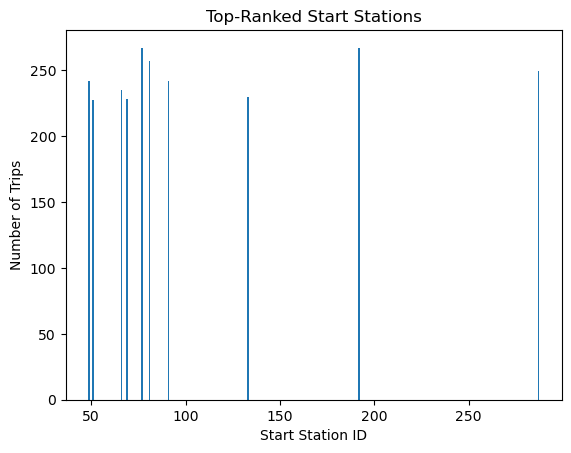

In [39]:
#create a bar plot with the start_station_id on 
#the x-axis and the number of trips on the y-axis, showing the top-ranked 
#start stations based on the number of trips that start at each station.

# Extract the start_station_id and counts columns from the top_start_stations DataFrame
x = top_start_stations['start_station_id']
y = top_start_stations['counts']

# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Start Station ID')
plt.ylabel('Number of Trips')
plt.title('Top-Ranked Start Stations')

# Show the plot
plt.show()

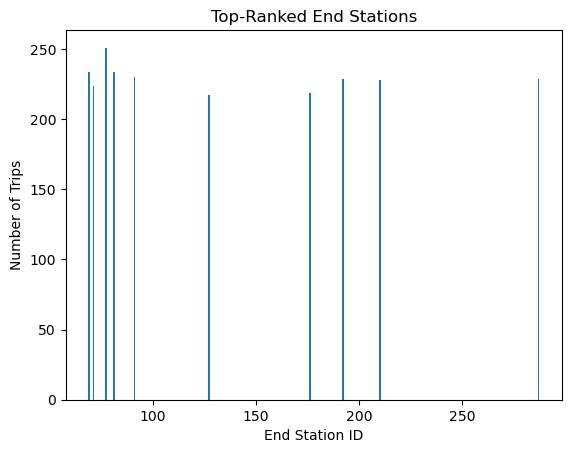

In [40]:
#create a bar plot of the top-ranked end stations:

# Extract the end_station_id and counts columns from the top_end_stations DataFrame
x = top_end_stations['end_station_id']
y = top_end_stations['counts']

# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('End Station ID')
plt.ylabel('Number of Trips')
plt.title('Top-Ranked End Stations')

# Show the plot
plt.show()

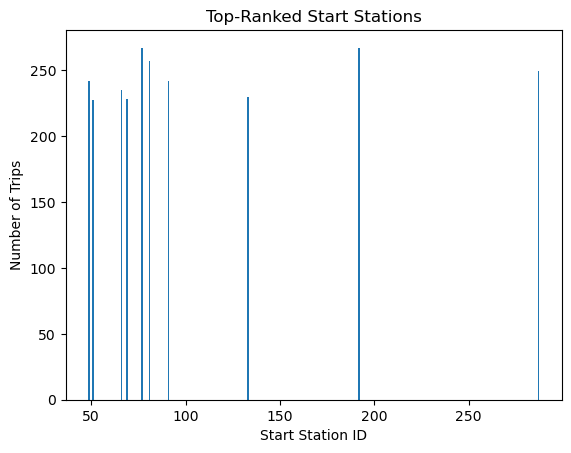

In [41]:
# Extract the start_station_id and counts columns from the top_start_stations DataFrame
x = top_start_stations['start_station_id']
y = top_start_stations['counts']

# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Start Station ID')
plt.ylabel('Number of Trips')
plt.title('Top-Ranked Start Stations')

# Show the plot
plt.show()

In [42]:
# Calculate the correlation between the 'counts' and 'start_latitude' columns
corr = top_start_stations['counts'].corr(top_start_stations['start_station_id'], method='pearson')

# Print the correlation coefficient
print(corr)


0.34036674525667715


In [43]:
import random
bike_list = bike_stations_geo["bike_id"].unique()
selected_bike_ID = random.choice(bike_list)

In [44]:
bike_stations_geo["Coordinates"] = list(zip(bike_stations_geo["start_lat"],bike_stations_geo["start_lng"]))

In [45]:
print(bike_stations_geo['Coordinates'].head())


0        (41.8915, -87.6268)
6384     (41.9227, -87.6972)
6393     (41.8969, -87.6217)
38307    (41.8827, -87.6325)
38573    (41.8944, -87.6227)
Name: Coordinates, dtype: object


In [46]:
import folium
from folium import plugins


#define new map
#41.8915, -87.6268
#Stamen toner 

#define new map

demand_heat_map = folium.Map(location=(41.8915, -87.6268),tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

demand_heat_map.add_child(plugins.HeatMap(bike_stations_geo[bike_stations_geo["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

folium.TileLayer('stamentoner').add_to(demand_heat_map)
folium.TileLayer('cartodbpositron').add_to(demand_heat_map)
folium.TileLayer('openstreetmap').add_to(demand_heat_map)
folium.LayerControl().add_to(demand_heat_map)

demand_heat_map

display(demand_heat_map)

In [50]:
s_demand_heat_map = folium.Map(location=(41.8915, -87.6268),  tiles='Stamen Watercolor', 
                       zoom_start=12, control_scale=True, max_zoom=20)
#MapBox
#Stamen


# add heat map

s_demand_heat_map.add_child(plugins.HeatMap(bike_stations_geo[bike_stations_geo["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

folium.TileLayer('stamentoner').add_to(s_demand_heat_map)
folium.TileLayer('cartodbpositron').add_to(s_demand_heat_map)
folium.TileLayer('openstreetmap').add_to(s_demand_heat_map)
folium.LayerControl().add_to(s_demand_heat_map)

s_demand_heat_map

In [51]:
e_demand_heat_map = folium.Map(location=(41.8915, -87.6268),  tiles='Stamen Terrain', 
                       zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

e_demand_heat_map.add_child(plugins.HeatMap(bike_stations_geo[bike_stations_geo["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

folium.TileLayer('stamentoner').add_to(e_demand_heat_map)
folium.TileLayer('cartodbpositron').add_to(e_demand_heat_map)
folium.TileLayer('openstreetmap').add_to(e_demand_heat_map)
folium.LayerControl().add_to(e_demand_heat_map)


e_demand_heat_map

In [53]:
df = pd.read_csv('bike_stations_2019.csv')
starts = df.drop(df.columns.difference(['start_station_name', 'start_lat', 'start_lng']), 1, inplace=False)
stops = df.drop(df.columns.difference(['end_station_name', 'end_lat', 'end_lng']), 1, inplace=False)
print(starts)
stops = stops.dropna()
print(stops)

               start_station_name  start_lat  start_lng
0        Western Ave & Leland Ave    41.9665   -87.6884
1         Clark St & Montrose Ave    41.9616   -87.6660
2          Broadway & Belmont Ave    41.9401   -87.6455
3          Clark St & Randolph St    41.8846   -87.6319
4            Clinton St & Lake St    41.8856   -87.6418
...                           ...        ...        ...
426882                      HQ QR    41.8899   -87.6803
426883      Rush St & Superior St    41.8958   -87.6259
426884     Clark St & Lincoln Ave    41.9157   -87.6346
426885  Franklin St & Illinois St    41.8910   -87.6355
426886      Dearborn St & Erie St    41.8940   -87.6293

[426887 rows x 3 columns]
                      end_station_name  end_lat  end_lng
0                Clark St & Leland Ave  41.9671 -87.6674
1       Southport Ave & Irving Park Rd  41.9542 -87.6644
2             Wilton Ave & Belmont Ave  41.9402 -87.6530
3             Fairbanks Ct & Grand Ave  41.8918 -87.6206
4               

/var/folders/vx/czkr3k7x7r95rxssqh3gjv180000gn/T/ipykernel_7696/1037773765.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  starts = df.drop(df.columns.difference(['start_station_name', 'start_lat', 'start_lng']), 1, inplace=False)
/var/folders/vx/czkr3k7x7r95rxssqh3gjv180000gn/T/ipykernel_7696/1037773765.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  stops = df.drop(df.columns.difference(['end_station_name', 'end_lat', 'end_lng']), 1, inplace=False)


In [55]:
import folium as fm
import pandas as pd
_stations_start = starts.groupby(['start_station_name', 'start_lat', 'start_lng'])['start_station_name'].count().reset_index(name='count')
_stations_start.sort_values('count', inplace=True)

_stations_stop = stops.groupby(['end_station_name', 'end_lat', 'end_lng'])['end_station_name'].count().reset_index(name='count')
_stations_stop.sort_values('count', inplace=True)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
          'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
          'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
          'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
          'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', \
          'lightgreen', 'gray', 'black', 'lightgray']

In [56]:
startmap = fm.Map(location=[starts.start_lat.mean(), starts.start_lng.mean()],
             zoom_start=9,
             control_scale=True)
_stations_start['marker_color'] = pd.cut(_stations_start['count'], bins= 8, labels=['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige'])
print(_stations_start)

for i, row in _stations_start.iterrows():
    html = f'''Station Name: {row['start_station_name']} <br> Count: {row['count']}'''
    iframe = fm.IFrame(html)

    popup = fm.Popup(iframe, min_width=150, max_width=300)

    fm.Marker(location=[row['start_lat'], row['start_lng']], popup=popup,
                    icon=fm.Icon(color=row['marker_color'])).add_to(startmap)

startmap

               start_station_name  start_lat  start_lng  count marker_color
35          Bennett Ave & 79th St    41.7518   -87.5785      1          red
428        Phillips Ave & 83rd St    41.7445   -87.5651      1          red
293       Kenton Ave & Madison St    41.8807   -87.7410      1          red
382        Michigan Ave & 71st St    41.7653   -87.6217      2          red
442          Racine Ave & 61st St    41.7832   -87.6544      2          red
..                            ...        ...        ...    ...          ...
149     Columbus Dr & Randolph St    41.8847   -87.6195   4425       orange
302      Kingsbury St & Kinzie St    41.8892   -87.6385   4626       orange
147  Clinton St & Washington Blvd    41.8834   -87.6412   5941     lightred
143       Clinton St & Madison St    41.8822   -87.6411   6797     lightred
79            Canal St & Adams St    41.8793   -87.6399   7813        beige

[607 rows x 5 columns]
